In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import re
import seaborn as sns
import scipy

%matplotlib inline

from geneset_plotting_functions import rank_comparison_plot, get_geneset_cats

# Load gene set categories
- mapping from gene sets to genes
- mapping from categories to gene sets

In [14]:
path_to_gs_data = "../../DATA/geneset_data/"
path_to_final_genes = "../../Pipeline_Outputs_Submitted/gene_rankings/"
gset="REACTOME"

In [15]:

gene_symbols = np.loadtxt(path_to_gs_data + "genesymbols.txt", dtype="str")
gmt_locations = {"REACTOME": path_to_gs_data + 'c2.all.v7.0.symbols_JustR.gmt',
                "KEGG": path_to_gs_data + 'c2.all.v7.0.symbols_JustK.gmt',
                "HALLMARK": path_to_gs_data + 'h.all.v7.0.symbols.gmt'}
for gs in ["mathys_celltypes", "sara_modules", "ben_modules", "mathys_microglia", "patrick_microglia", "olah_microglia"]:
    gmt_locations[gs] = path_to_gs_data + "%s/processed/gene_set.gmt"%gs
    

category_genes = {}

for gset in ["KEGG", "REACTOME", "olah_microglia"]:
    
    gmt, category_to_geneset, geneset_to_category = get_geneset_cats(gset, path_to_gs_data, gmt_locations)

    category_genes[gset] = {}
    for category in category_to_geneset.keys():
        genes_in_cat = np.array([])
        genesets = category_to_geneset[category]
        for geneset in genesets:
            if geneset in gmt["names"].values:
                genes_in_cat = np.append(genes_in_cat, gmt[gmt["names"]==geneset]["genes"].values[0])
        category_genes[gset][category] = np.unique(genes_in_cat)

# Load feature rankings

In [22]:

CONSENSUS_SCORES = {}
for var in ["all"]:
    for model in ["Correlations", "MTL"]:
        CONSENSUS_SCORES["%s~%s-related"%(model,var)] = pd.read_csv(path_to_final_genes + "%s/%s-related.rnk"%(model,var), sep="\t", header=None, names=["gene", "score"]).sort_values("score", ascending=False).reset_index(drop=True)
for key in CONSENSUS_SCORES.keys():
    CONSENSUS_SCORES[key]["abs_score"] = CONSENSUS_SCORES[key]["score"].apply(lambda x: (x-.5)*2 if x>=.5 else (.5-x)*2)
    CONSENSUS_SCORES[key]["abs_score"] = scipy.stats.rankdata(CONSENSUS_SCORES[key]["abs_score"])/len(gene_symbols)
    CONSENSUS_SCORES[key]["score"] = scipy.stats.rankdata(CONSENSUS_SCORES[key]["score"])/len(gene_symbols)
    CONSENSUS_SCORES[key]["gene_sign"] = CONSENSUS_SCORES[key]["score"].apply(lambda x: " + " if x>.5 else "  -  ")


COMPARISONS = ["MTL~all-related","Correlations~all-related"]
rankings = [CONSENSUS_SCORES[key] for key in COMPARISONS]
RANKED_GENES = rankings[0].merge(rankings[1], on="gene", suffixes=([":%s"%x for x in COMPARISONS]))
RANKED_GENES["feature"] = RANKED_GENES["gene"] 


# MAKING PLOTS

### REACTOME

In [23]:
gset="REACTOME"
ranking_method = "abs_"
LEFT_METHOD_NAME = "%sscore:%s"%(ranking_method, COMPARISONS[0])
RIGHT_METHOD_NAME = "%sscore:%s"%(ranking_method, COMPARISONS[1])
CATEGORIES = list(category_genes[gset].keys())
RANKED_FEATURES = RANKED_GENES

color_lim=display_lim=.99

[red, blue, purple, grey]
Immune System [19, 11, 3, 0]
Metabolism [21, 9, 1, 0]
Metabolism of proteins [10, 13, 1, 0]
REACTOME_AUTOPHAGY [1, 1, 1, 0]
REACTOME_CELLULAR_RESPONSES_TO_EXTERNAL_STIMULI [3, 6, 0, 0]
REACTOME_CELL_CELL_COMMUNICATION [0, 2, 0, 0]
REACTOME_CELL_CYCLE [5, 5, 0, 0]
REACTOME_CHROMATIN_ORGANIZATION [2, 2, 0, 0]
REACTOME_CIRCADIAN_CLOCK [0, 0, 0, 0]
REACTOME_DEVELOPMENTAL_BIOLOGY [9, 8, 0, 0]
REACTOME_DIGESTION_AND_ABSORPTION [0, 0, 0, 0]
REACTOME_DISEASE [7, 6, 1, 0]
REACTOME_DNA_REPAIR [2, 0, 0, 0]
REACTOME_DNA_REPLICATION [1, 2, 0, 0]
REACTOME_EXTRACELLULAR_MATRIX_ORGANIZATION [5, 6, 0, 0]
REACTOME_GENE_EXPRESSION_TRANSCRIPTION [4, 11, 0, 0]
REACTOME_HEMOSTASIS [10, 8, 0, 0]
REACTOME_METABOLISM_OF_RNA [2, 6, 0, 0]
REACTOME_MUSCLE_CONTRACTION [2, 3, 0, 0]
REACTOME_NEURONAL_SYSTEM [6, 2, 0, 0]
REACTOME_ORGANELLE_BIOGENESIS_AND_MAINTENANCE [2, 1, 0, 0]
REACTOME_PROGRAMMED_CELL_DEATH [0, 3, 0, 0]
REACTOME_PROTEIN_LOCALIZATION [0, 1, 0, 0]
REACTOME_REPRODUCTION [2, 1

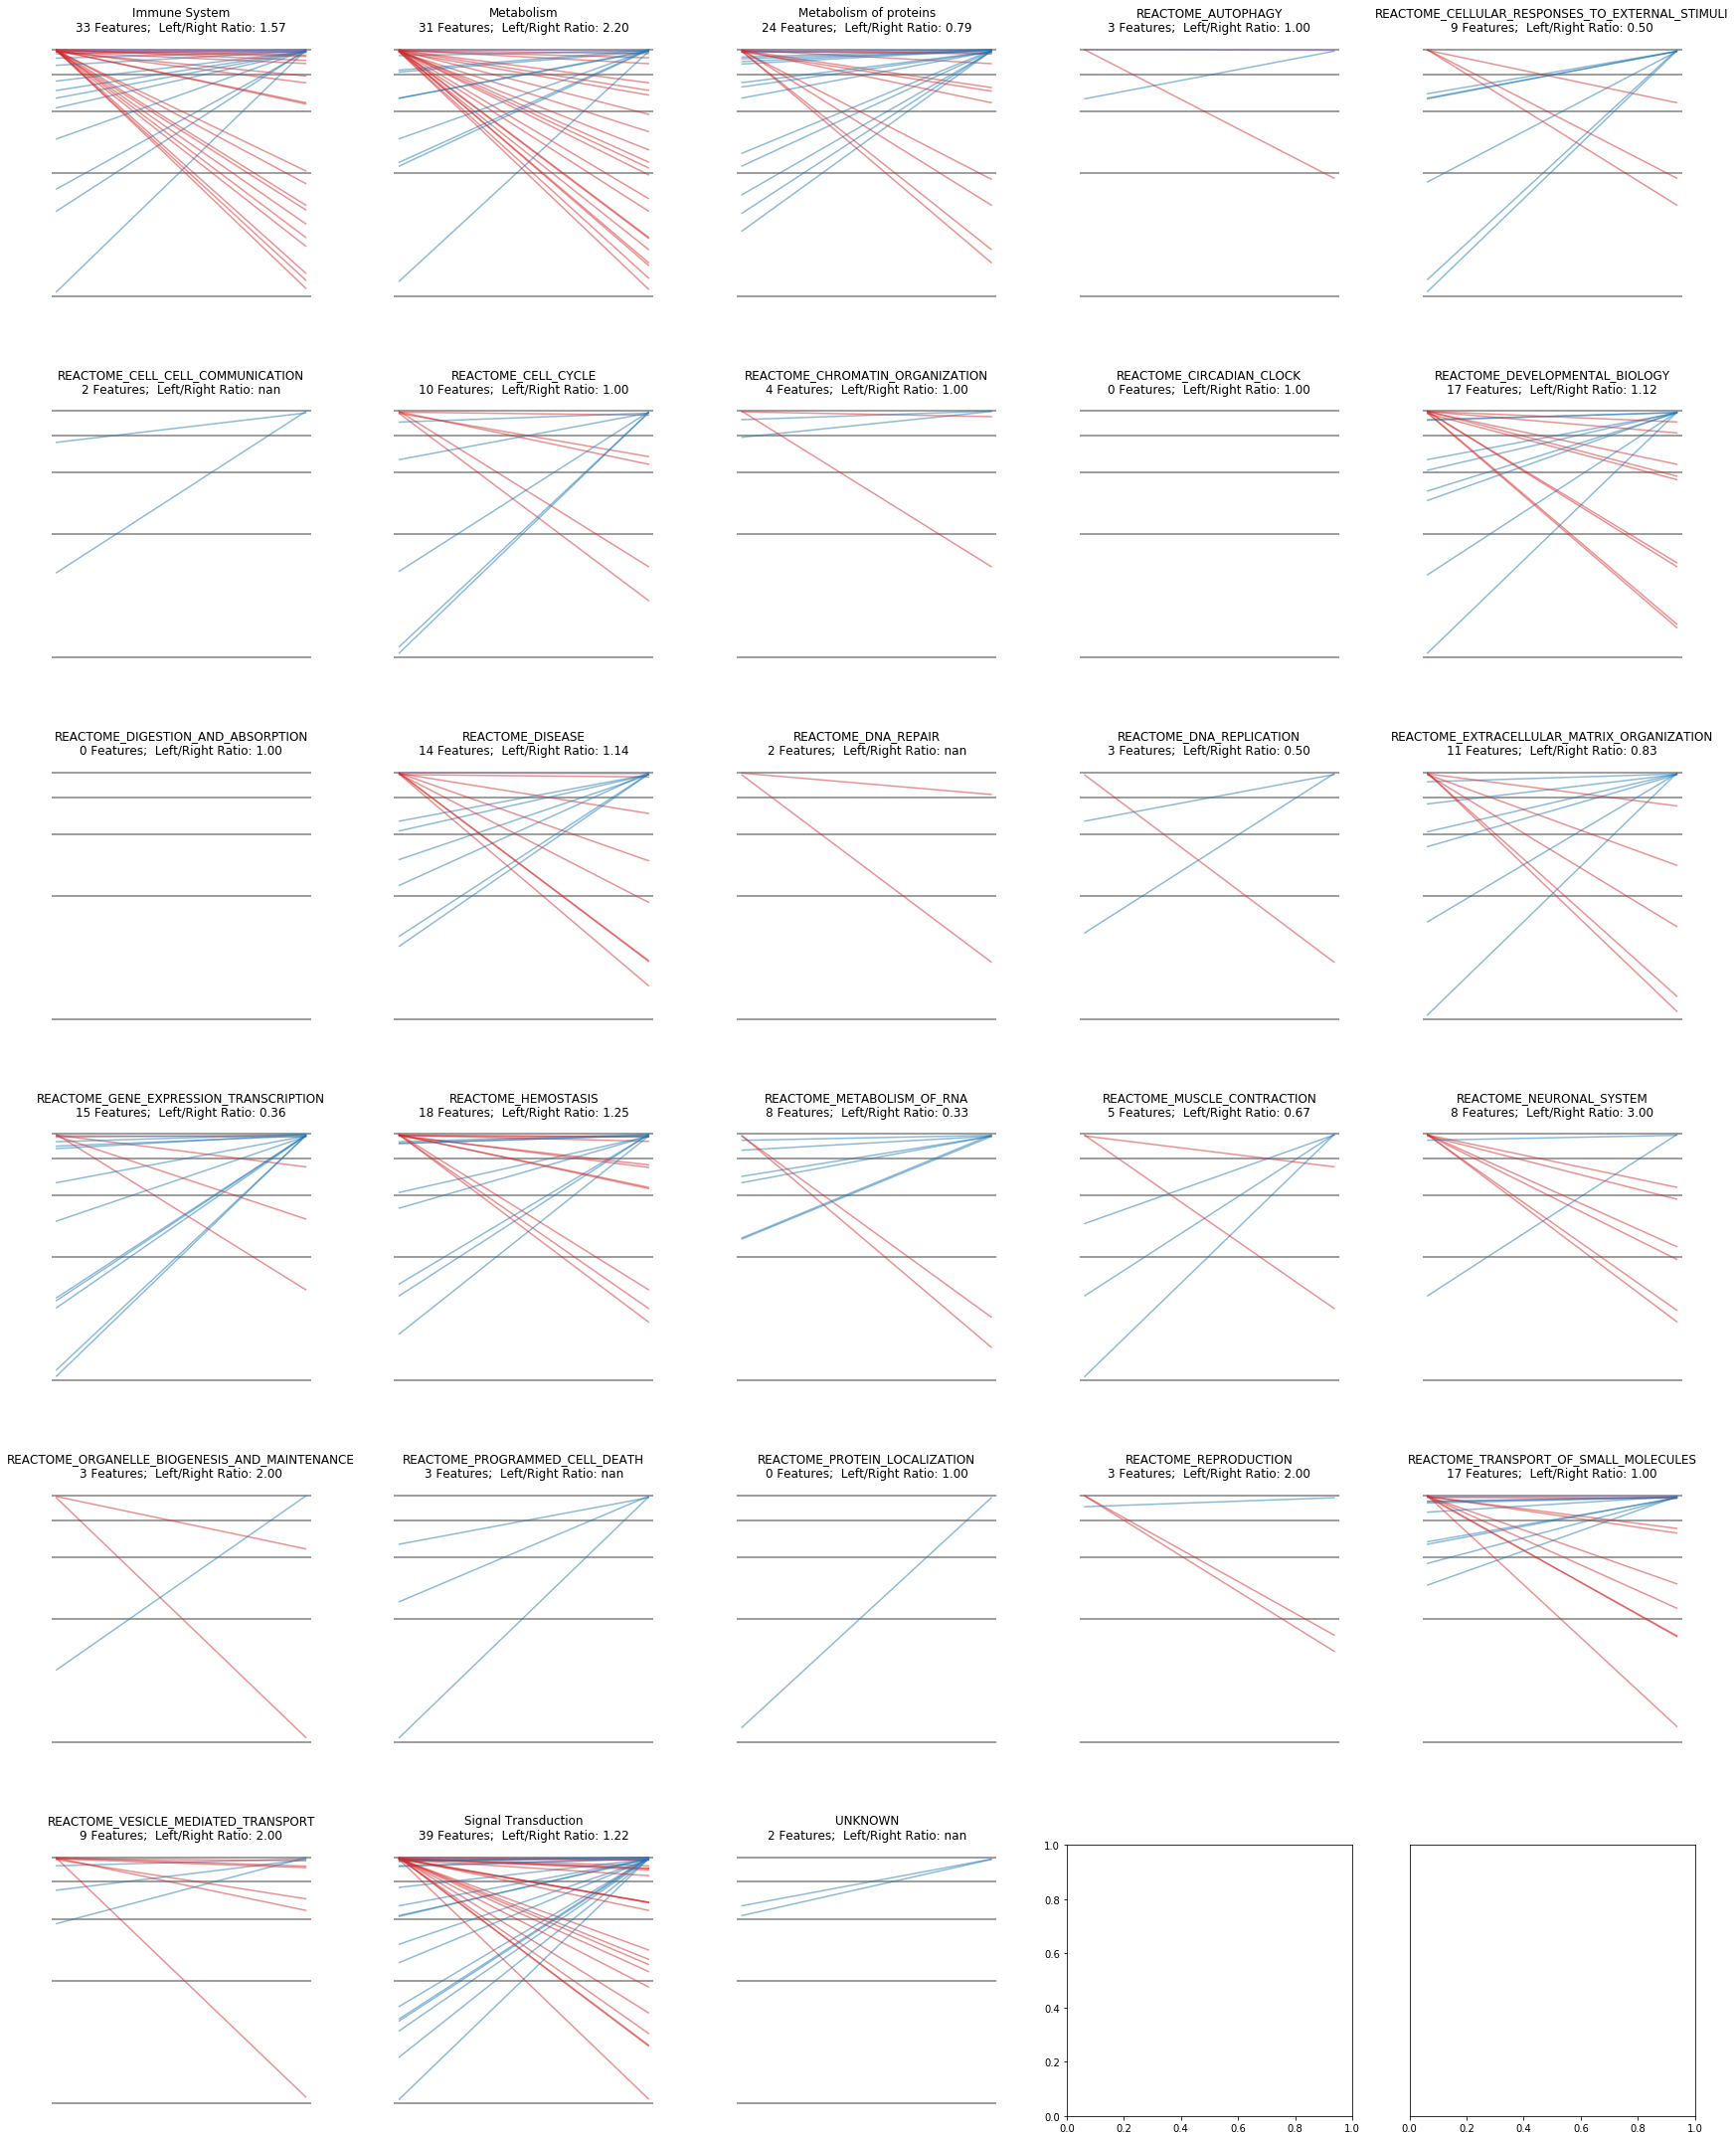

In [24]:
feature_counts,ratios,axs = rank_comparison_plot(RANKED_FEATURES, CATEGORIES,  category_genes[gset], LEFT_METHOD_NAME, RIGHT_METHOD_NAME, MAX_COLS=5, display_lim=display_lim, color_lim=color_lim)

#### REACTOME - cleaned up by filtering out categories with few genes, and sorting from most MD-AD-leaning to most correlations-leaning

[red, blue, purple, grey]
Metabolism [21, 9, 1, 0]
Immune System [19, 11, 3, 0]
REACTOME_HEMOSTASIS [10, 8, 0, 0]
Signal Transduction [21, 17, 1, 0]
REACTOME_DEVELOPMENTAL_BIOLOGY [9, 8, 0, 0]
REACTOME_TRANSPORT_OF_SMALL_MOLECULES [8, 8, 1, 0]
Metabolism of proteins [10, 13, 1, 0]
REACTOME_GENE_EXPRESSION_TRANSCRIPTION [4, 11, 0, 0]


(array([31, 33, 18, 39, 17, 17, 24, 15]),
 array([2.2       , 1.57142857, 1.25      , 1.22222222, 1.125     ,
        1.        , 0.78571429, 0.36363636]),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc345a8ee90>,
       dtype=object))

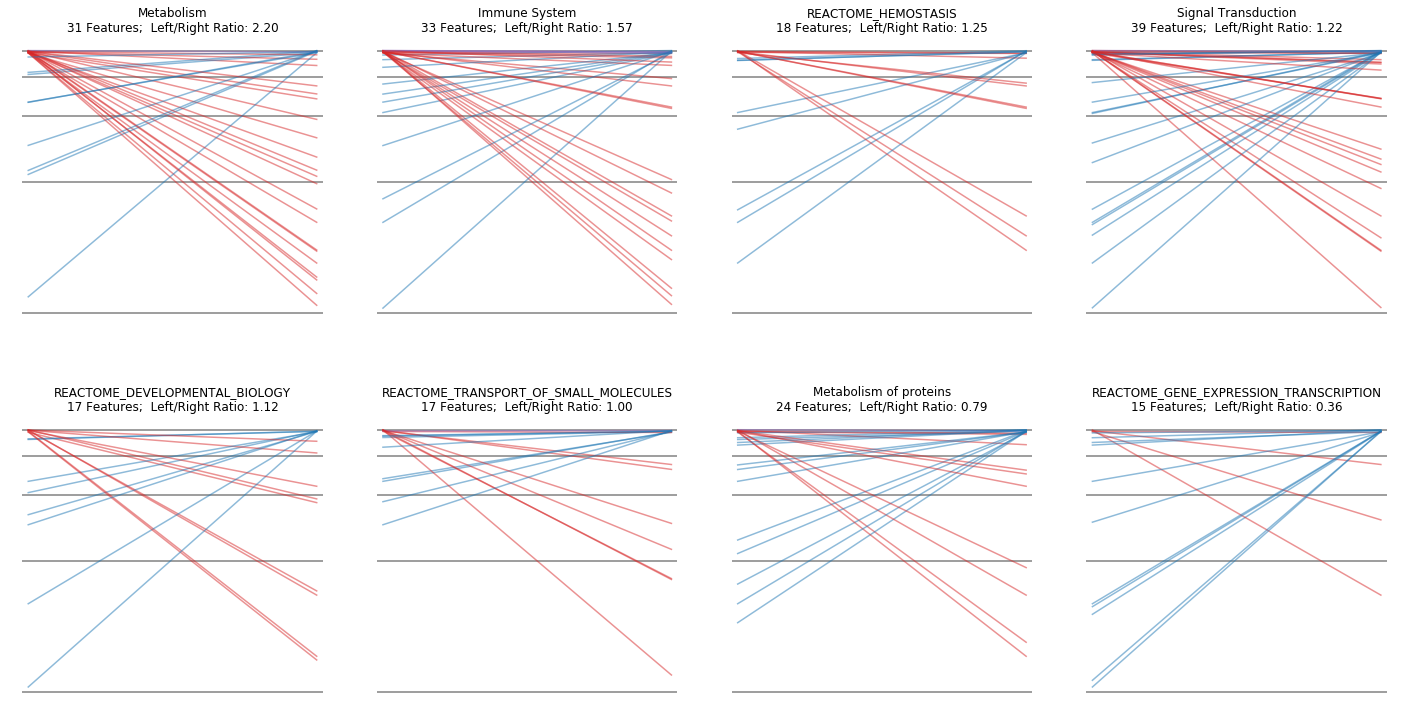

In [26]:
size_selected_cats = np.where(feature_counts >= 15)[0]
new_cats =  np.array(CATEGORIES)[size_selected_cats]
# sort categories from highest to lowest left:right ratio
ordered_new_cats = new_cats[np.argsort(ratios[size_selected_cats])[::-1]]

rank_comparison_plot(RANKED_FEATURES, ordered_new_cats,  category_genes[gset], LEFT_METHOD_NAME, RIGHT_METHOD_NAME, MAX_COLS=4, display_lim=display_lim, color_lim=display_lim)


### KEGG

In [27]:
gset="KEGG"
ranking_method = "abs_"
LEFT_METHOD_NAME = "%sscore:%s"%(ranking_method, COMPARISONS[0])
RIGHT_METHOD_NAME = "%sscore:%s"%(ranking_method, COMPARISONS[1])
CATEGORIES = list(category_genes[gset].keys())
RANKED_FEATURES = RANKED_GENES

color_lim=display_lim=.98

[red, blue, purple, grey]
Aging [0, 0, 0, 0]
Amino acid metabolism [5, 3, 0, 0]
Biosynthesis of other secondary metabolites [0, 0, 0, 0]
Cancer: overview [4, 3, 0, 0]
Cancer: specific types [4, 3, 0, 0]
Carbohydrate metabolism [6, 4, 1, 0]
Cardiovascular disease [6, 6, 0, 0]
Cell growth and death [2, 6, 0, 0]
Cell motility [3, 6, 0, 0]
Cellular community - eukaryotes [5, 10, 0, 0]
Cellular community - prokaryotes [0, 0, 0, 0]
Chemical structure transformation maps [0, 0, 0, 0]
Chronology: Antiinfectives [0, 0, 0, 0]
Chronology: Antineoplastics [0, 0, 0, 0]
Chronology: Nervous system agents [0, 0, 0, 0]
Chronology: Other drugs [0, 0, 0, 0]
Circulatory system [3, 2, 0, 0]
Development and regeneration [5, 0, 0, 0]
Digestive system [0, 0, 0, 0]
Drug resistance: antimicrobial [0, 0, 0, 0]
Drug resistance: antineoplastic [0, 0, 0, 0]
Endocrine and metabolic disease [2, 0, 0, 0]
Endocrine system [2, 3, 0, 0]
Energy metabolism [4, 2, 0, 0]
Environmental adaptation [0, 0, 0, 0]
Excretory system

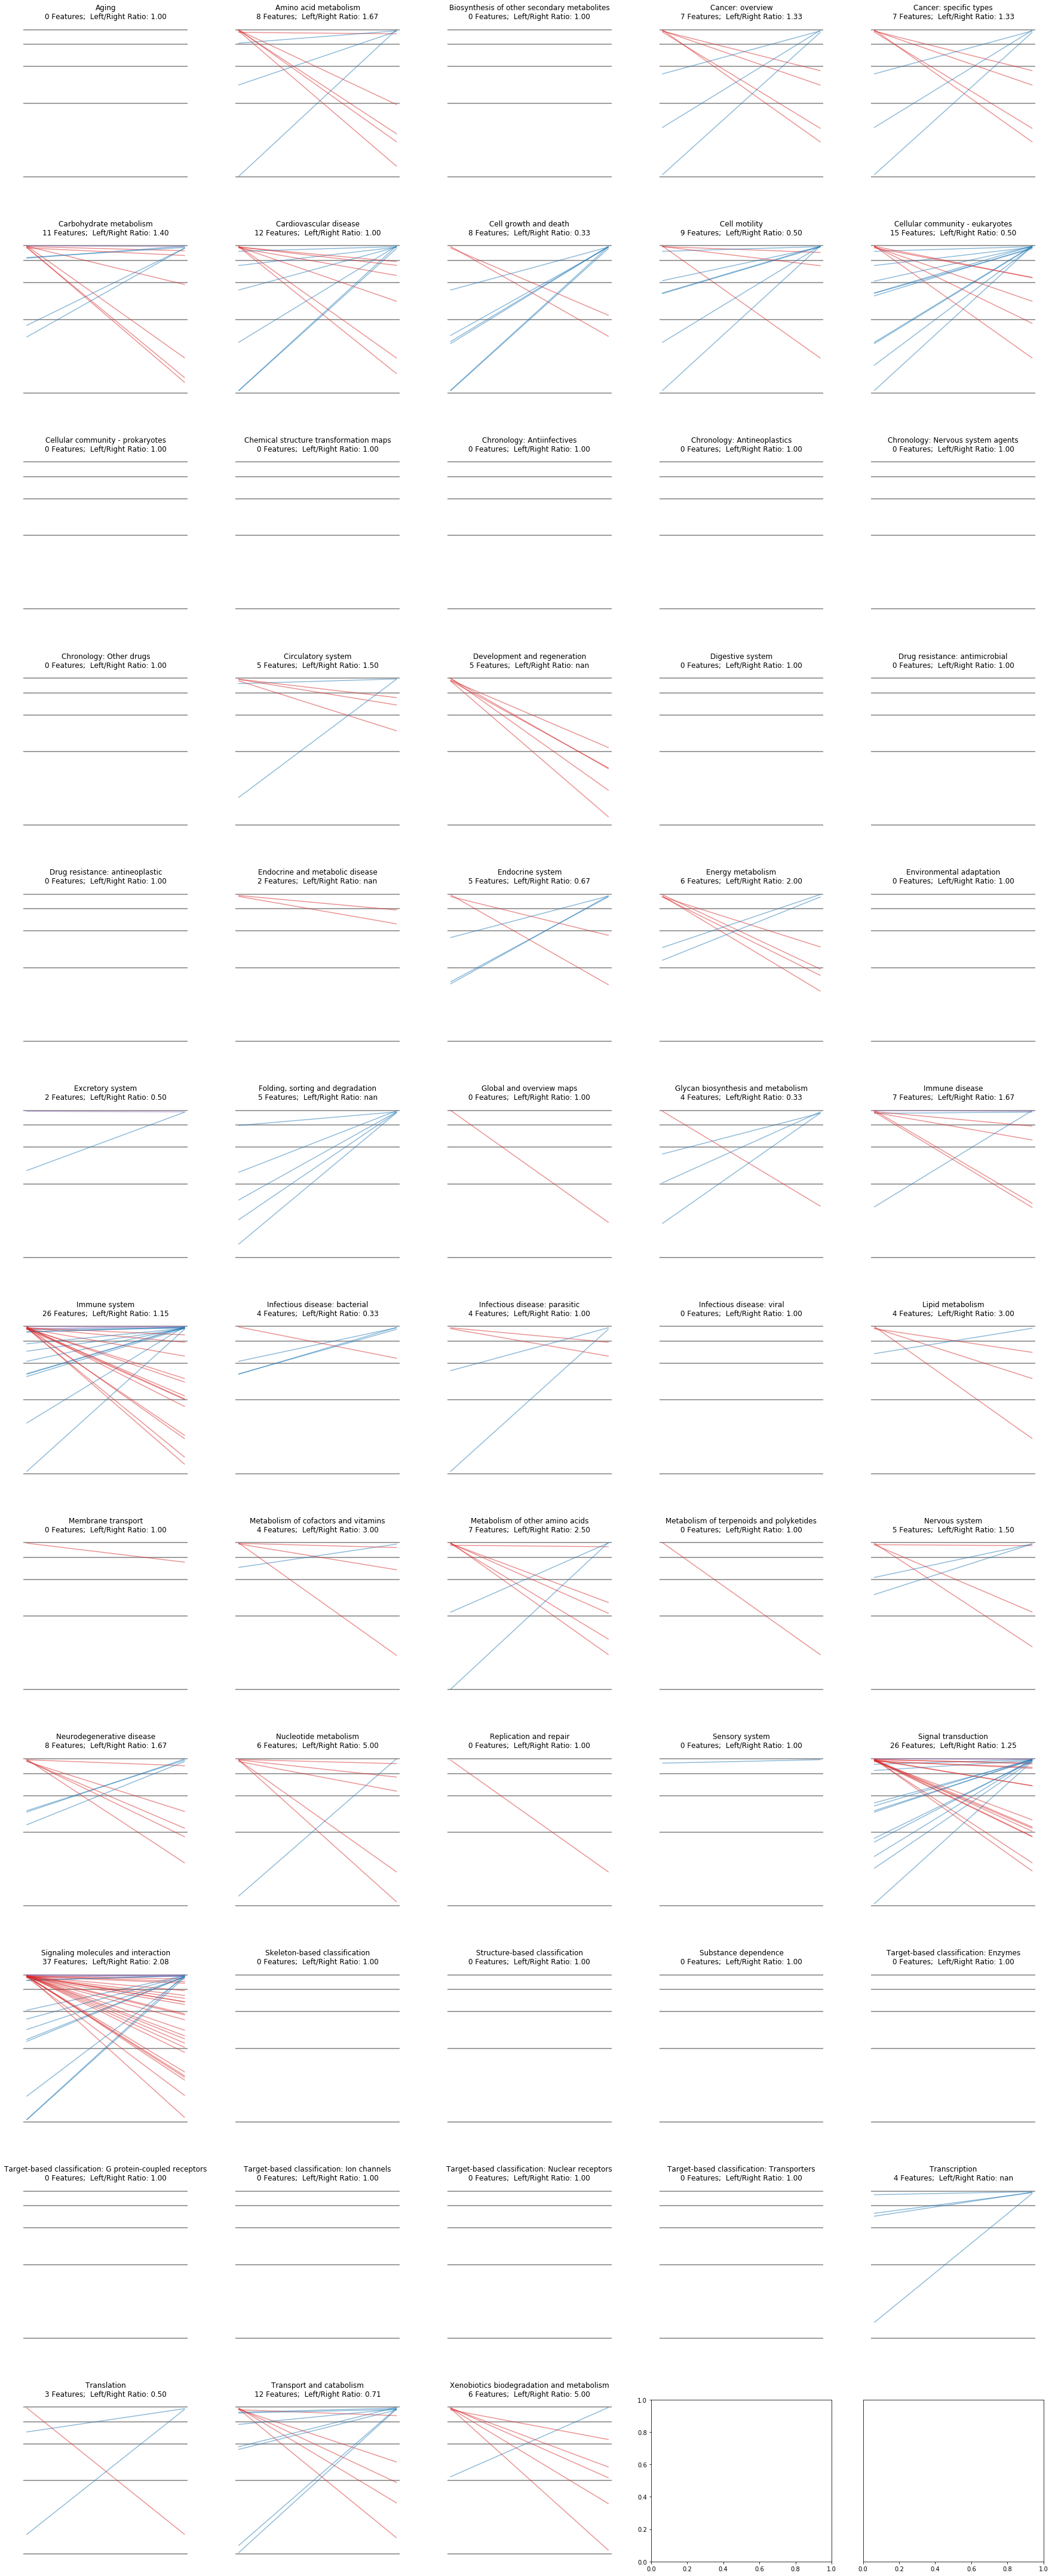

In [28]:
feature_counts,ratios,axs = rank_comparison_plot(RANKED_FEATURES, CATEGORIES,  category_genes[gset], LEFT_METHOD_NAME, RIGHT_METHOD_NAME, MAX_COLS=5, display_lim=display_lim, color_lim=color_lim)

[red, blue, purple, grey]
Signaling molecules and interaction [24, 10, 3, 0]
Signal transduction [14, 11, 1, 0]
Immune system [13, 11, 2, 0]
Cellular community - eukaryotes [5, 10, 0, 0]


(array([37, 26, 26, 15]),
 array([2.07692308, 1.25      , 1.15384615, 0.5       ]),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc3439630d0>,
       dtype=object))

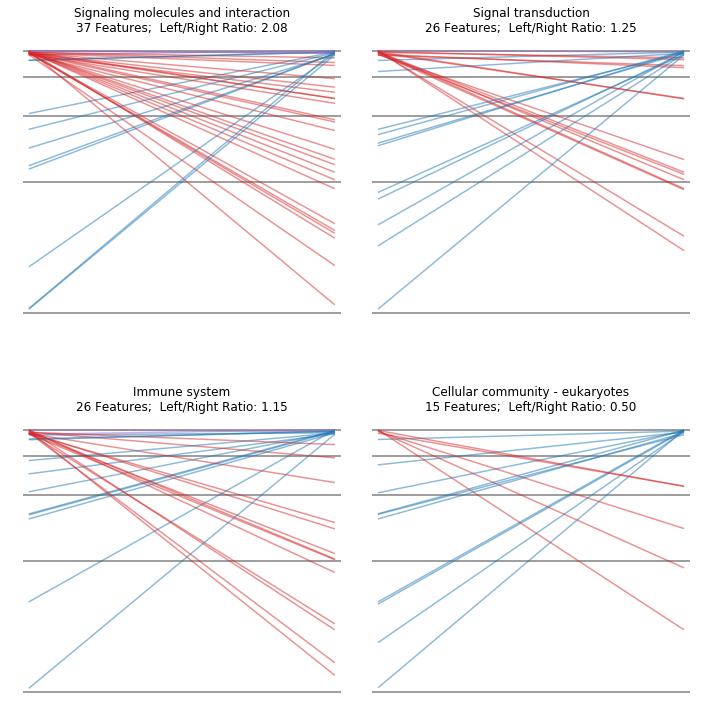

In [29]:
size_selected_cats = np.where(feature_counts >= 15)[0]
new_cats =  np.array(CATEGORIES)[size_selected_cats]
# sort categories from highest to lowest left:right ratio
ordered_new_cats = new_cats[np.argsort(ratios[size_selected_cats])[::-1]]

rank_comparison_plot(RANKED_FEATURES, ordered_new_cats,  category_genes[gset], LEFT_METHOD_NAME, RIGHT_METHOD_NAME, MAX_COLS=2, display_lim=display_lim, color_lim=display_lim)


### Olah et al 2020 - microglial clusters

In [30]:
gset="olah_microglia"
ranking_method = "abs_"
LEFT_METHOD_NAME = "%sscore:%s"%(ranking_method, COMPARISONS[0])
RIGHT_METHOD_NAME = "%sscore:%s"%(ranking_method, COMPARISONS[1])
CATEGORIES = list(category_genes[gset].keys())
RANKED_FEATURES = RANKED_GENES

color_lim=display_lim=.99

[red, blue, purple, grey]
1 [1, 0, 0, 0]
2 [5, 2, 0, 0]
3 [1, 0, 0, 0]
4 [3, 1, 1, 0]
5 [8, 2, 0, 0]
6 [9, 5, 0, 0]
7 [4, 1, 0, 0]
8 [8, 3, 0, 0]
9 [8, 14, 0, 0]


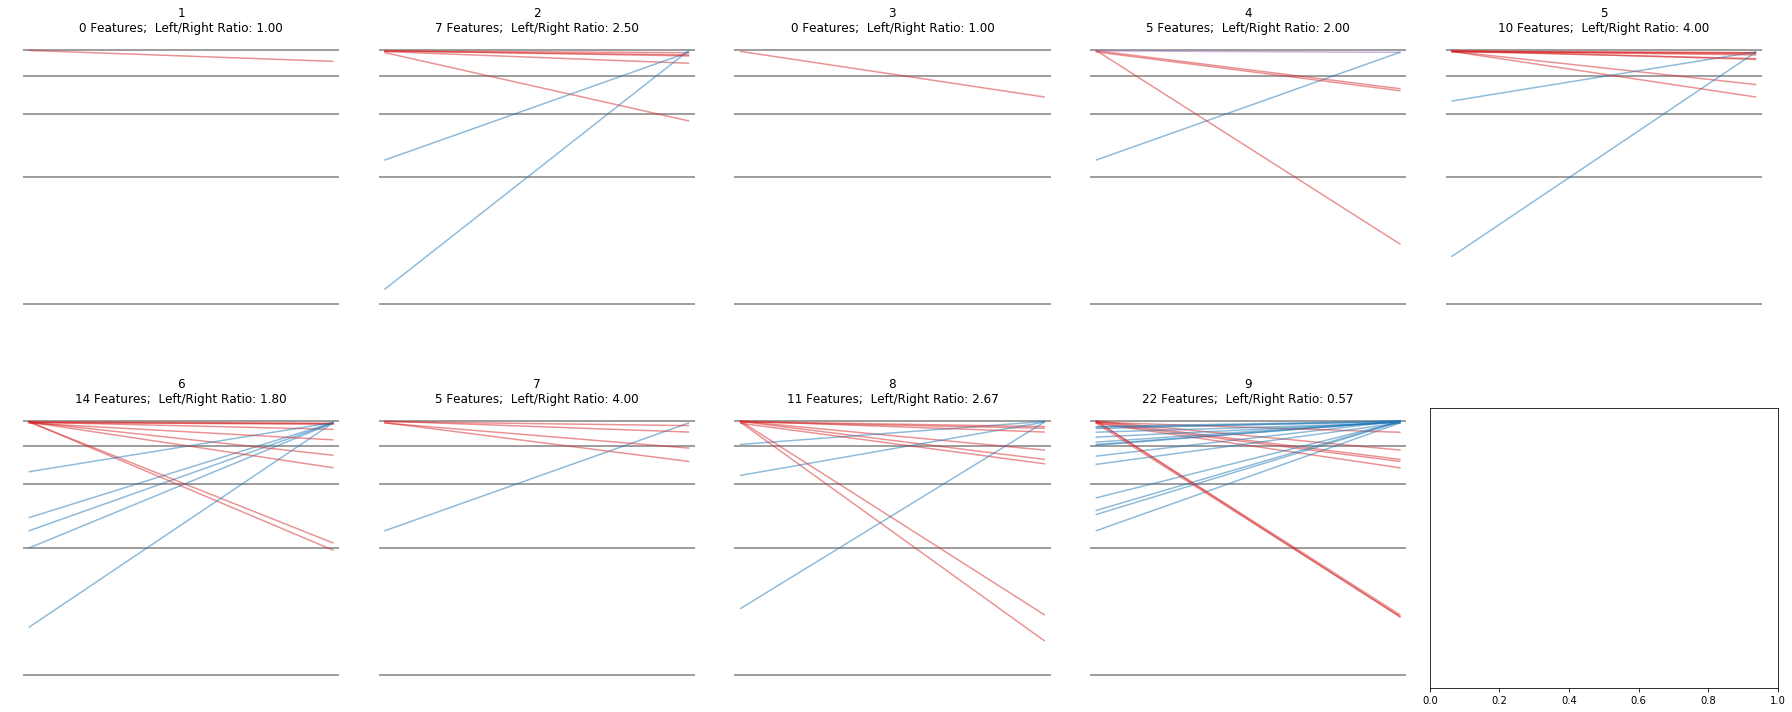

In [31]:
feature_counts,ratios,axs = rank_comparison_plot(RANKED_FEATURES, CATEGORIES,  category_genes[gset], LEFT_METHOD_NAME, RIGHT_METHOD_NAME, MAX_COLS=5, display_lim=display_lim, color_lim=color_lim)